In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
train_dataset = pd.read_csv('fashion-mnist_train.csv')

In [4]:
test_dataset = pd.read_csv('fashion-mnist_test.csv')

In [5]:
train_dataset.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_dataset.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train_dataset.shape

(60000, 785)

In [8]:
test_dataset.shape

(10000, 785)

In [9]:
#convert training dataset to an array
training_dataset = np.array(train_dataset,dtype='float32')

In [10]:
#convert test dataset to an array
testing_dataset = np.array(test_dataset,dtype='float32')

In [11]:
#function to specify the label is for which class
def specify_class(title_num):
    if title_num == 0:
        title = 'T-shirt/top'
    elif title_num == 1:
        title = 'Trouser'
    elif title_num == 2:
        title = 'Pullover'
    elif title_num == 3:
        title = 'Dress'
    elif title_num == 4:
        title = 'Coat'
    elif title_num == 5:
        title = 'Sandal'
    elif title_num == 6:
        title = 'Shirt'
    elif title_num == 7:
        title = 'Sneaker'
    elif title_num == 8:
        title = 'Bag'
    elif title_num == 9:
        title = 'Ankle boot'
    
    return title

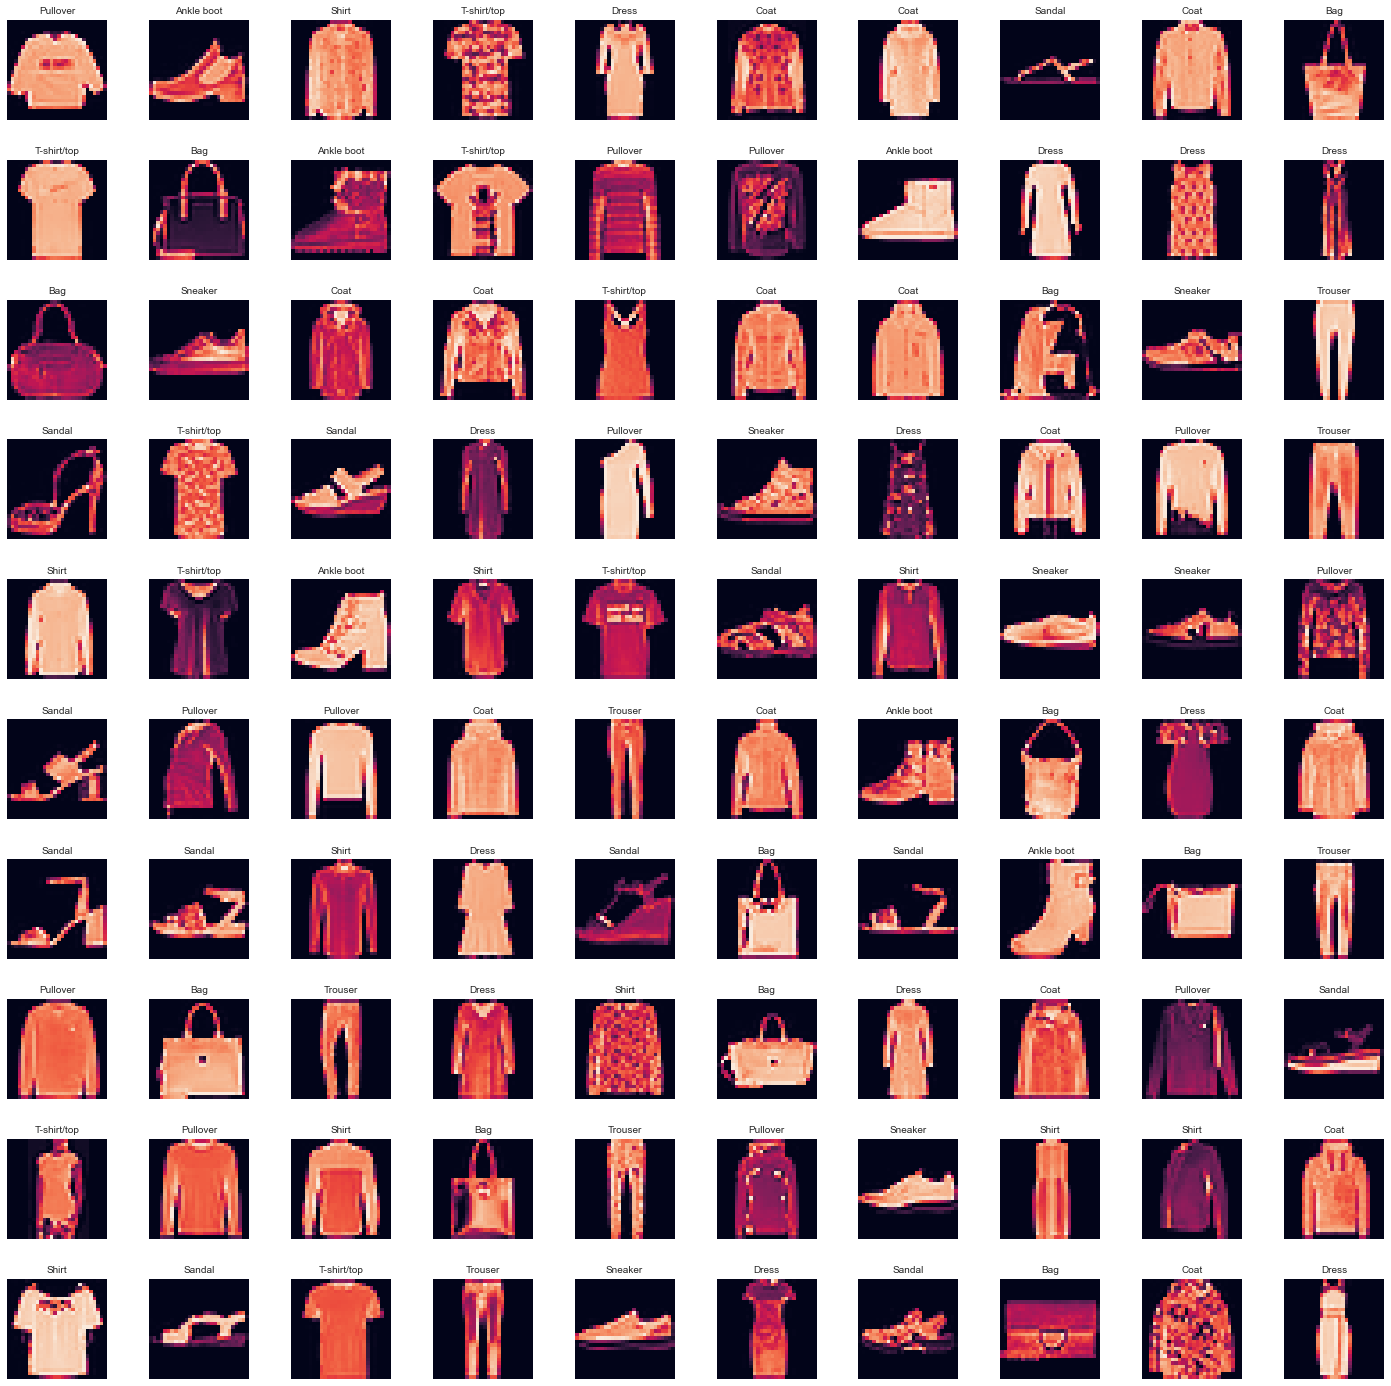

In [12]:
#to see 15*15 images of training set 
#15 picture in the each row
W_grid = 10
#15 picture in each column
H_grid = 10
#totaly 255 data from training set
fig,axes = plt.subplots(H_grid,W_grid,figsize = (25,25))
axes = axes.ravel()
n_data_training =len(training_dataset)

for i in np.arange(0,W_grid*H_grid):
    index = np.random.randint(0,n_data_training)
    axes[i].imshow(training_dataset[i,1:].reshape(28,28))
    title_num = training_dataset[i,0]
    title = specify_class(title_num)
    axes[i].set_title(title,fontsize = 10)
    axes[i].axis('off');
plt.subplots_adjust(hspace=0.4)

In [13]:
#define x and y for create a model
X = training_dataset[:,1:]/255
Y = training_dataset[:,0]

In [14]:
#define x and y for test set
X_test = testing_dataset[:,1:]/255
Y_test = testing_dataset[:,0]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#define x and y for training set and validation set
X_train,X_validation,Y_train,Y_validation = train_test_split(X,Y,test_size=0.2,random_state=12345)

In [17]:
#reshape X of these 3 dataset to 28*28
X_train = X_train.reshape(X_train.shape[0], * (28,28,1))
X_test = X_test.reshape(X_test.shape[0] ,* (28,28,1))
X_validation = X_validation.reshape(X_validation.shape[0], * (28,28,1))

In [18]:
#import libraries for CNN
import tensorflow as tf

In [19]:
#initializing CNN
cnn = tf.keras.models.Sequential()

In [20]:
#add Convulutional to cnn
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,input_shape = [28,28,1],activation='relu'))

In [21]:
#add maxpool layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [22]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [23]:
#add flatten layer
cnn.add(tf.keras.layers.Flatten())

In [24]:
#make a full connected 
cnn.add(tf.keras.layers.Dense(activation='relu',units = 32))

In [25]:
#add output layer
cnn.add(tf.keras.layers.Dense(activation='sigmoid',units = 10))

In [26]:
#training CNN
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
#fit cnn to training set and validation data
cnn.fit(x=X_train,y=Y_train,validation_data=(X_validation,Y_validation),batch_size =512,epochs=50)

Epoch 1/50
94/94 [==============================] - 39s 382ms/step - loss: 0.7348 - accuracy: 0.7445 - val_loss: 0.4568 - val_accuracy: 0.8380
Epoch 2/50
94/94 [==============================] - 33s 350ms/step - loss: 0.4308 - accuracy: 0.8467 - val_loss: 0.3883 - val_accuracy: 0.8637
Epoch 3/50
94/94 [==============================] - 39s 416ms/step - loss: 0.3829 - accuracy: 0.8642 - val_loss: 0.3519 - val_accuracy: 0.8792
Epoch 4/50
94/94 [==============================] - 42s 448ms/step - loss: 0.3493 - accuracy: 0.8760 - val_loss: 0.3257 - val_accuracy: 0.8856
Epoch 5/50
94/94 [==============================] - 44s 464ms/step - loss: 0.3327 - accuracy: 0.8839 - val_loss: 0.3125 - val_accuracy: 0.8923
Epoch 6/50
94/94 [==============================] - 36s 377ms/step - loss: 0.3207 - accuracy: 0.8860 - val_loss: 0.3055 - val_accuracy: 0.8924
Epoch 7/50
94/94 [==============================] - 39s 413ms/step - loss: 0.3080 - accuracy: 0.8903 - val_loss: 0.2907 - val_accuracy: 0.8982

In [28]:
#evaluating the model
evaluation = cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2357 - accuracy: 0.9214


In [29]:
print("Test Accuracy :{:.3f}".format(evaluation[1]))

Test Accuracy :0.921


In [30]:
predict_class=cnn.predict(X_test) 
classes_x=np.argmax(predict_class,axis=1)

313/313 [==============================] - 2s 6ms/step


In [31]:
classes_x

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

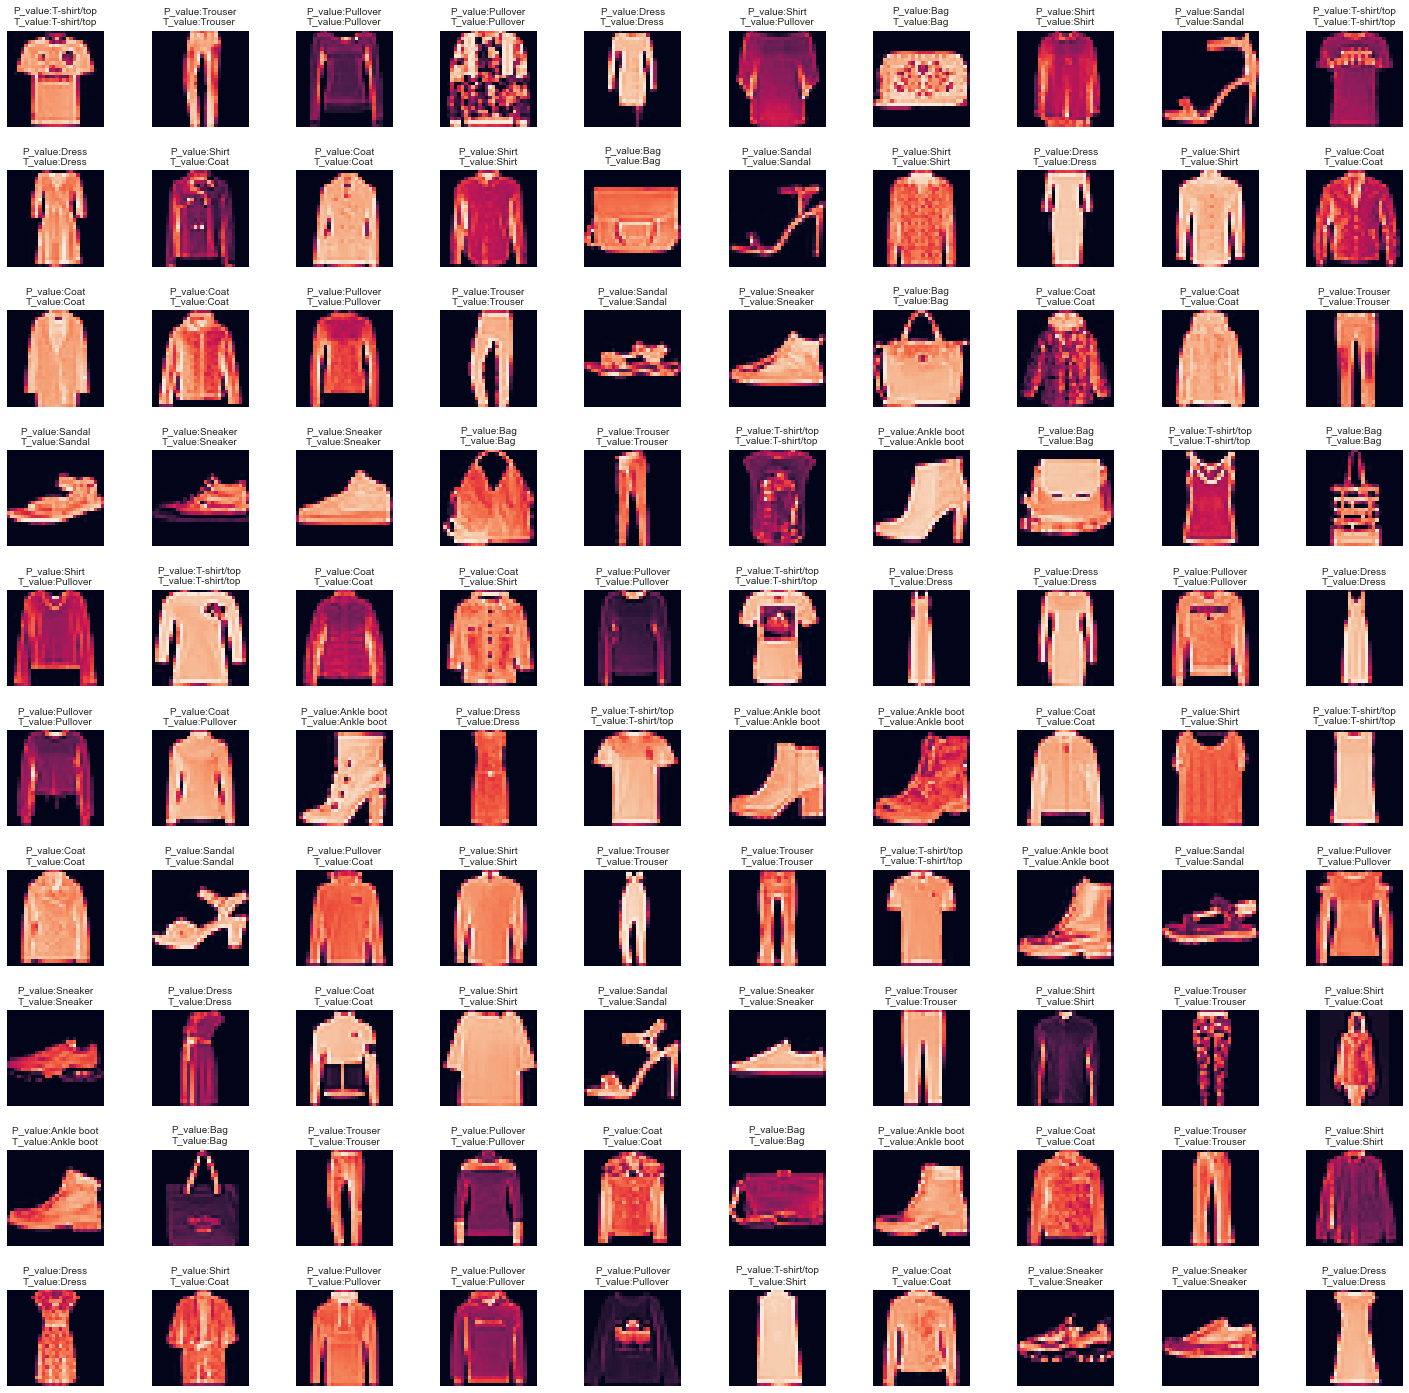

In [32]:
#to see 10*10 images of test set 
#10 picture in the each row
W_grid = 10
#10 picture in each column
H_grid = 10
#totaly 100 data from training set
fig,axes = plt.subplots(H_grid,W_grid,figsize = (25,25))
axes = axes.ravel()

for i in np.arange(0,W_grid*H_grid):
    axes[i].imshow(X_test[i].reshape(28,28))
    title_num =classes_x[i]
    title = specify_class(title_num)
        
        
    y_num =Y_test[i]
    y_title = specify_class(y_num)
    axes[i].set_title("P_value:{p_v}\nT_value:{t_v}".format(p_v=title,t_v =y_title),fontsize = 10)
    axes[i].axis('off');
plt.subplots_adjust(hspace=0.4,wspace=0.5)

<AxesSubplot:>

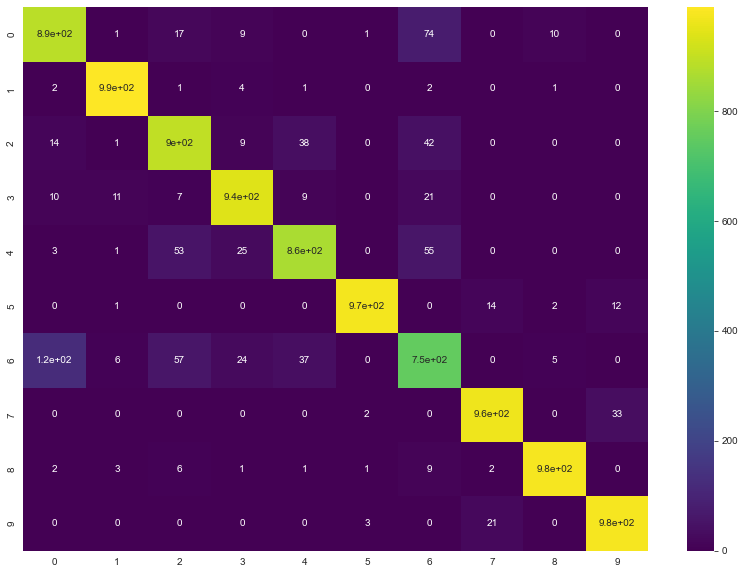

In [33]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(Y_test,classes_x)
plt.figure(figsize=(14,10))
sns.heatmap(matrix,annot=True,cmap='viridis')

In [34]:
from sklearn.metrics import classification_report
classes = 10
target_name = ["Class{}".format(i) for i in range(classes)]

report = classification_report(Y_test,classes_x,target_names=target_name)
print(report)

              precision    recall  f1-score   support

      Class0       0.85      0.89      0.87      1000
      Class1       0.98      0.99      0.98      1000
      Class2       0.86      0.90      0.88      1000
      Class3       0.93      0.94      0.94      1000
      Class4       0.91      0.86      0.89      1000
      Class5       0.99      0.97      0.98      1000
      Class6       0.79      0.75      0.77      1000
      Class7       0.96      0.96      0.96      1000
      Class8       0.98      0.97      0.98      1000
      Class9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

